In [33]:
from remote_vgk import *
from buffet import (
    buffet_classification
)

import numpy as np
import matplotlib.pyplot as plt

def load_password(path):

    with open(path) as f:
        secrets = json.load(f)
        shifted_pwd = secrets['password']
    pwd = ''
    for s in shifted_pwd:
        pwd += chr(ord(s) - 1)

    return pwd

In [34]:
try:
    window = gw.getWindowsWithTitle("millenicut")[0]
except IndexError:
    raise Exception("Window not found")

pwd = load_password('secrets.json')
sesh = DPO_Session('lwp26', pwd)

App = AirfoilApp(sesh.teaching_client, window, "2.3_incidence_aerofoil")

# IMPORTANT SET THE SAME PARAMETERS AS ON THE APP
App.alpha = 1.75
App.M = 0.76
App.Re = 10

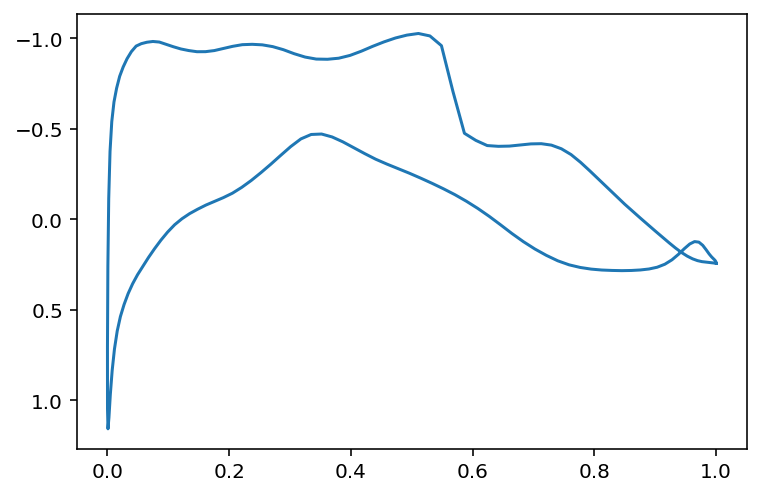

In [35]:

res = App.run(0.77, 1.9, 10)

plt.plot(res.x, res.cp)

# flip y axis
plt.gca().invert_yaxis()


In [36]:
print(res.Cl, res.Cd, res.CD2)

0.59949 0.01379 0.0049700000000000005


In [37]:

#App.classify_buffeting()

0.7533 0.24025
0.77 0.24361
0.75 0.23881
0.75 0.23881
0.75 0.23881
0.75 0.23881
0.75 0.23881
0.75 0.23881
0.75 0.23881
0.75 0.23881
0.75 0.23881
0.75 0.23881
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.74 0.23297
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7467 0.23802
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.24025
0.7533 0.240

C:\Users\louis\AppData\Local\Temp\ipykernel_21164\1277507745.py:54: UserWarning: No contour levels were found within the data range.
  ax.contour(x_grid, y_grid, z_grid_smoothed, levels=[0], colors='black', linewidths=1, zorder = 20)


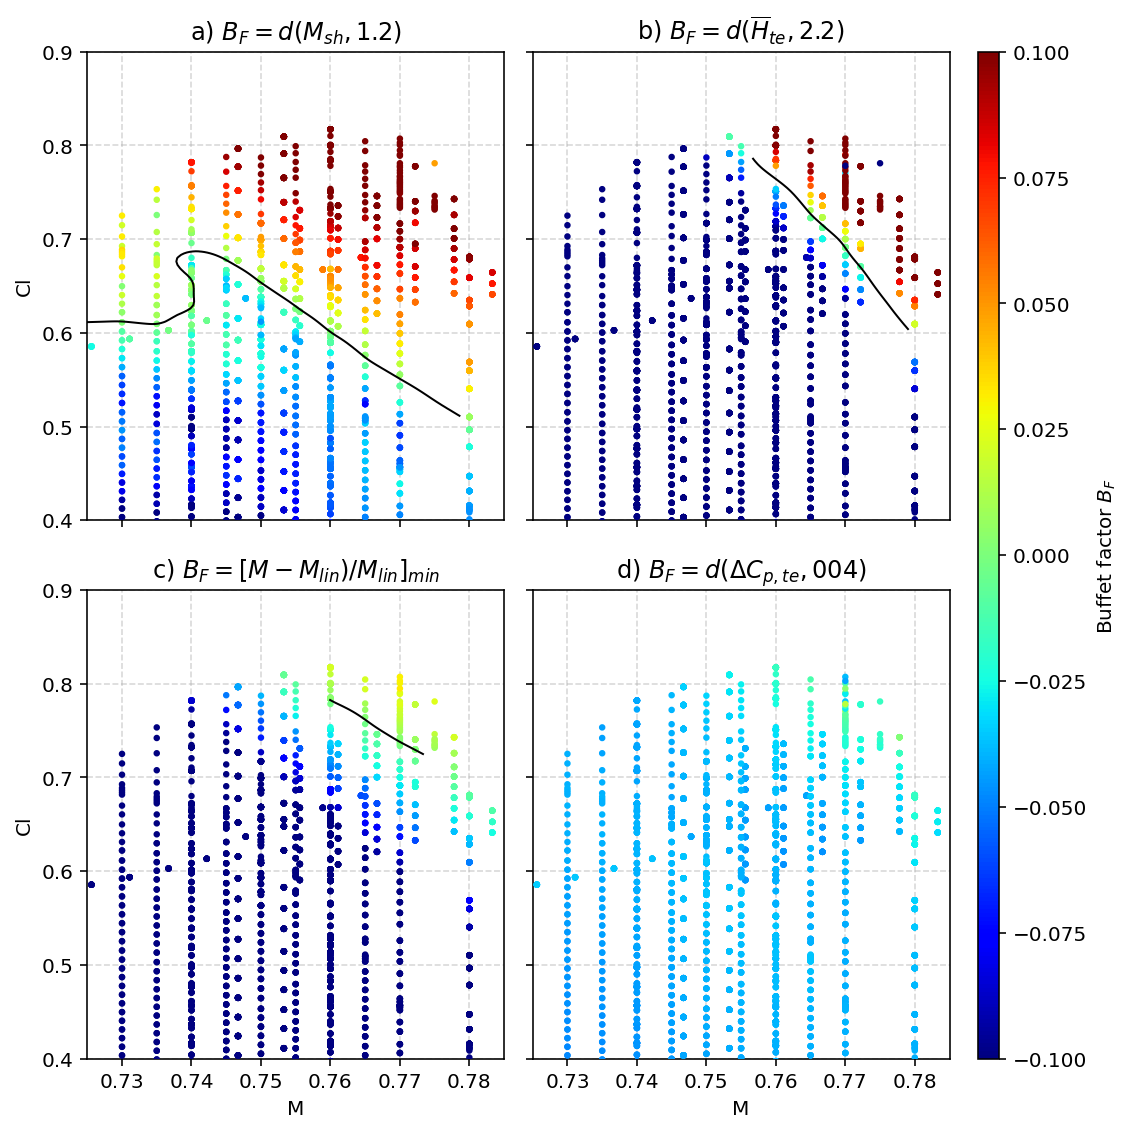

In [65]:
from matplotlib import gridspec
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

# scatter plot
buffet_types = [
    'a) $B_F = d(M_{sh}, 1.2)$',
    'b) $B_F = d(\overline{H}_{te}, 2.2)$',
    'c) $B_F = [M - M_{lin})/M_{lin}]_{min}$',
    'd) $B_F = d(\Delta C_{p,te}, 004)$'
]

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[1, 1, 0.05])
# Create subplots with shared axes
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs[1, 0], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs[1, 1], sharex=ax1, sharey=ax1)
colax = fig.add_subplot(gs[:2, 2:])  # For the colorbar

axes = [ax1, ax2, ax3, ax4]

for nt,type in enumerate(buffet_types):

    ax = axes[nt]

    Cl_list = []
    M_list = []
    alpha_list = []

    for res in App:
        
        Cl_list.append(res.Cl)
        M_list.append(res.M)
        alpha_list.append(res.alpha)

    buffeting_list = np.nan*np.ones(len(Cl_list))
    i = 0
    for res in App:
        if len(res.buffet_causes) > 0:
            buffeting_list[i] = res.buffet_causes[nt]
        i += 1

    x_grid, y_grid = np.meshgrid(
        np.linspace(np.min(M_list), np.max(M_list), 200),
        np.linspace(np.min(Cl_list), np.max(Cl_list), 200)
        )

    z_grid = griddata((M_list, Cl_list), buffeting_list, (x_grid, y_grid), method='linear')
    z_grid_smoothed = gaussian_filter(z_grid, sigma=2) 

    scat = ax.scatter(M_list, Cl_list, c=buffeting_list, s = 5, cmap='jet', vmin=-0.1, vmax=0.1, zorder = 10)
    ax.contour(x_grid, y_grid, z_grid_smoothed, levels=[0], colors='black', linewidths=1, zorder = 20)
    ax.set_xlim(0.725, 0.785)
    ax.set_ylim(0.4, 0.9)
    # create colourbar
    ax.grid( linestyle='--', alpha=0.5, zorder=1)
    ax.set_title(f'{type}')

for ax in [ax2, ax4]:  # Hide y-axis labels for the right column
    ax.tick_params(labelleft=False)
for ax in [ax1, ax2]:  # Hide x-axis labels for the bottom row
    ax.tick_params(labelbottom=False)

for ax in [ax1, ax3]:
    ax.set_ylabel("Cl")
for ax in [ax3, ax4]:
    ax.set_xlabel("M")
    ax.set_xticks(np.arange(0.73, 0.78, 0.01))

cbar = fig.colorbar(scat, cax=colax, orientation='vertical')
cbar.set_label("Buffet factor $B_F$")

plt.tight_layout()
plt.savefig('figures/buffet_classification.png', dpi = 400)
plt.show()